# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.149215e+01     8.490691e+00
 * time: 0.001302957534790039
     1     2.896076e+01     4.689232e+00
 * time: 0.005117177963256836
     2     1.944037e+01     3.740516e+00
 * time: 0.009588956832885742
     3     1.341284e+01     2.996448e+00
 * time: 0.013444185256958008
     4     1.291726e+01     3.655489e+00
 * time: 0.01652216911315918
     5     1.073603e+01     2.096999e+00
 * time: 0.0200960636138916
     6     1.000288e+01     2.670749e+00
 * time: 0.02309703826904297
     7     9.158972e+00     2.030724e+00
 * time: 0.02621316909790039
     8     8.508171e+00     1.066441e+00
 * time: 0.02927398681640625
     9     8.219295e+00     8.563037e-01
 * time: 0.03295612335205078
    10     8.072661e+00     9.117196e-01
 * time: 0.036669015884399414
    11     7.990600e+00     5.868336e-01
 * time: 0.04018211364746094
    12     7.905904e+00     5.260523e-01
 * time: 0.043823957443237305
    13     7.866025e+00     6.653104e-01
 * 

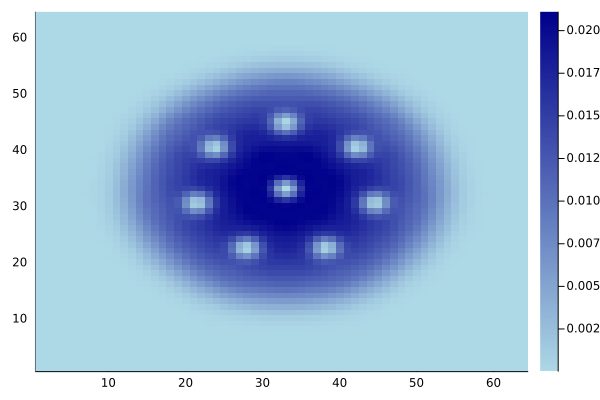

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)